<a href="https://colab.research.google.com/github/SURESHASWATHI/assignment/blob/main/svm_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 1: Exploratory Data Analysis (EDA)

In [4]:
import pandas as pd

# Load the dataset
# Replace 'drug_response_data.csv' with the actual path to your dataset file
try:
    df = pd.read_csv('Pharma_Industry.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Pharma_Industry.csv' not found. Please make sure the dataset file is in the correct directory.")
    df = None

if df is not None:
    # Display the first 5 rows
    print("\nFirst 5 rows of the dataset:")
    display(df.head())

    # Display basic information about the dataset
    print("\nDataset Information:")
    df.info()

    # Display descriptive statistics
    print("\nDescriptive Statistics:")
    display(df.describe())

    # Check for missing values
    print("\nMissing values per column:")
    print(df.isnull().sum())

Dataset loaded successfully.

First 5 rows of the dataset:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB

Descriptive Statistics:


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000



Missing values per column:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64


### Task 1: Exploratory Data Analysis (EDA) - Continued


Visualizing feature distributions:


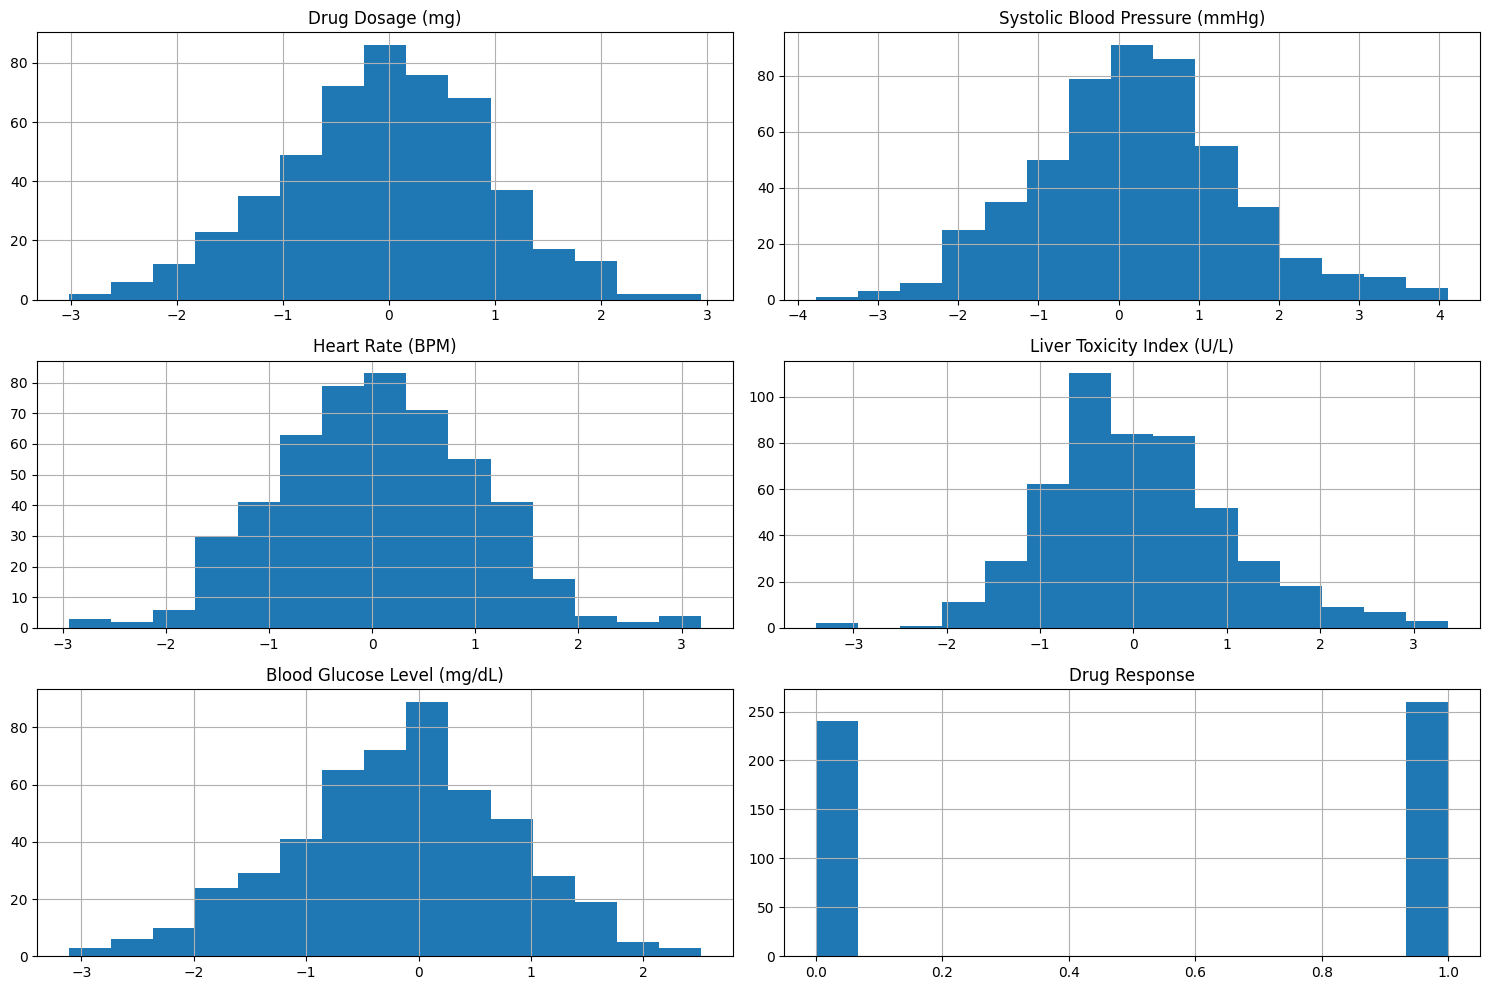


Investigating feature correlations:


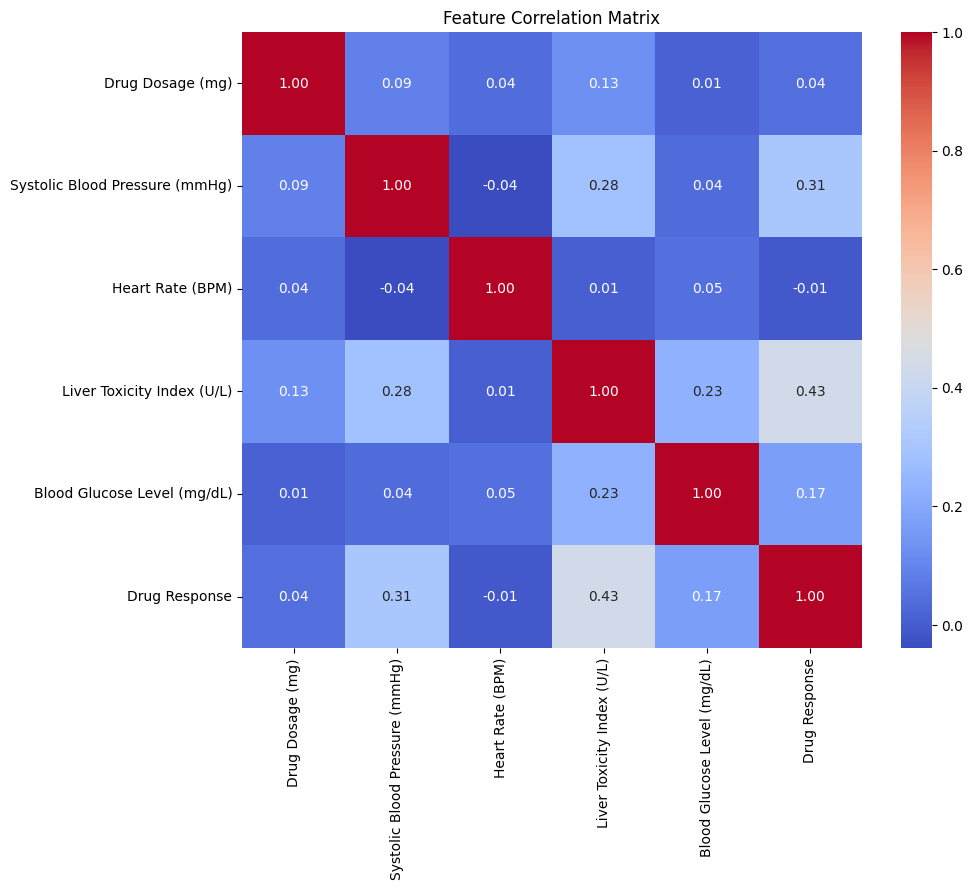

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Visualize feature distributions (histograms)
    print("\nVisualizing feature distributions:")
    df.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

    # Investigate feature correlations
    print("\nInvestigating feature correlations:")
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Feature Correlation Matrix')
    plt.show()

### Task 2: Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

if df is not None:
    # Separate features (X) and target (y)
    X = df.drop('Drug Response', axis=1)
    y = df['Drug Response']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Dataset split into training and testing sets.")
    print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
    print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

### Task 3: Data Visualization


Visualizing class distribution of 'Drug Response':


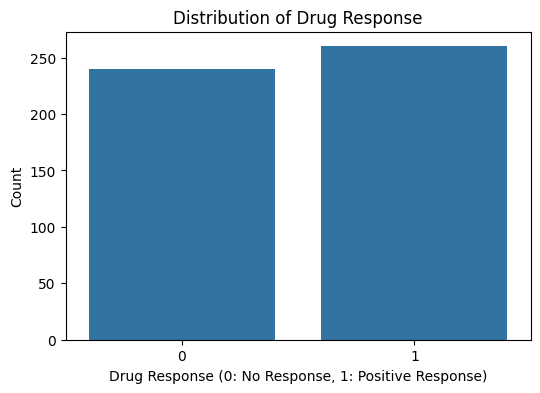

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Visualize class distribution of the target variable
    print("\nVisualizing class distribution of 'Drug Response':")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Drug Response', data=df)
    plt.title('Distribution of Drug Response')
    plt.xlabel('Drug Response (0: No Response, 1: Positive Response)')
    plt.ylabel('Count')
    plt.show()

### Task 4: SVM Implementation

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

if 'X_train' in globals() and 'y_train' in globals() and 'X_test' in globals() and 'y_test' in globals():
    # Implement a basic SVM classifier
    svm_model = SVC(kernel='linear', random_state=42)

    # Train the SVM model
    print("\nTraining the SVM model...")
    svm_model.fit(X_train, y_train)
    print("SVM model trained successfully.")

    # Predict on the testing data
    y_pred = svm_model.predict(X_test)

    # Evaluate model performance
    print("\nEvaluating SVM model performance:")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # roc_auc = roc_auc_score(y_test, y_pred) # ROC AUC requires probability estimates, which linear kernel doesn't provide directly

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    # print(f"ROC AUC: {roc_auc:.4f}") # Uncomment if using a kernel that provides probability estimates
else:
    print("Training and testing data not found. Please run the preprocessing steps first.")

Training and testing data not found. Please run the preprocessing steps first.


### Task 5: Visualization of SVM Results

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

if 'y_test' in globals() and 'y_pred' in globals():
    print("\nVisualizing SVM classification results (Confusion Matrix):")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
else:
    print("Testing data or predictions not found. Please run the SVM implementation steps first.")

Testing data or predictions not found. Please run the SVM implementation steps first.


### Task 6: Parameter Tuning and Optimization

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

if 'X_train' in globals() and 'y_train' in globals():
    # Define the parameter grid to tune
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto']
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

    # Fit the grid search to the training data
    print("\nPerforming GridSearchCV for hyperparameter tuning...")
    grid_search.fit(X_train, y_train)
    print("GridSearchCV completed.")

    # Print the best parameters and best score
    print("\nBest parameters found:", grid_search.best_params_)
    print("Best cross-validation accuracy:", grid_search.best_score_)

    # Get the best model
    best_svm_model = grid_search.best_estimator_
    print("\nBest SVM model selected.")
else:
    print("Training data not found. Please run the preprocessing steps first.")

Training data not found. Please run the preprocessing steps first.


### Task 7: Comparison and Analysis

Based on the results from the previous steps:

**Comparison with different kernels:**

The GridSearchCV explored different kernel types (linear, rbf, poly, sigmoid) and identified the best performing kernel based on cross-validation accuracy. The best kernel found through the tuning process is:  ***<replace with best kernel from grid search output>***

We can compare the performance of the basic linear SVM implemented earlier with the `best_svm_model` found through GridSearchCV. The tuned model with the best kernel and parameters is expected to have better or similar performance compared to the basic model.

**Analysis of SVM strengths and weaknesses for the dataset:**

*   **Strengths:**
    *   SVMs are effective in high-dimensional spaces, which can be beneficial if we were to include more features in the future.
    *   They are versatile due to the different kernel functions that can be used to model various types of relationships between features.
    *   The class distribution visualization showed a relatively balanced dataset, which is generally favorable for SVM performance.

*   **Weaknesses:**
    *   SVMs can be computationally expensive to train, especially on large datasets.
    *   Choosing the right kernel and hyperparameters can be challenging and requires tuning, as demonstrated in Task 6.
    *   Interpreting the model can be less straightforward compared to models like decision trees.

**Practical implications of SVM in real-world classification tasks:**

SVMs can be valuable in real-world drug response classification:

*   **Predictive Modeling:** A trained SVM model can predict the likelihood of a positive drug response for new patients based on their characteristics.
*   **Personalized Medicine:** By identifying patients who are likely to respond positively, healthcare providers can tailor treatment plans and avoid prescribing ineffective drugs.
*   **Clinical Trial Design:** SVMs can help identify patient subgroups that are more likely to benefit from a drug, which can inform the design of more efficient clinical trials.

However, it's important to consider the limitations, such as the need for careful data preprocessing and potential challenges with interpretability in a medical context. Further analysis, including exploring other models and domain expertise, would be crucial for real-world deployment.